# Model Evaluation Metrics

### 3. Testing your models

In [1]:
import pandas as pd
import numpy as np

# Import statements 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Import the train test split
# http://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html
from sklearn.model_selection import train_test_split

In [2]:
data = np.asarray(pd.read_csv('datasets/dee.csv', header=None))
print(data)

[[0.24539  0.81725  0.      ]
 [0.21774  0.76462  0.      ]
 [0.20161  0.69737  0.      ]
 [0.20161  0.58041  0.      ]
 [0.2477   0.49561  0.      ]
 [0.32834  0.44883  0.      ]
 [0.39516  0.48099  0.      ]
 [0.39286  0.57164  0.      ]
 [0.33525  0.62135  0.      ]
 [0.33986  0.71199  0.      ]
 [0.34447  0.81433  0.      ]
 [0.28226  0.82602  0.      ]
 [0.26613  0.75     0.      ]
 [0.26613  0.63596  0.      ]
 [0.32604  0.54825  0.      ]
 [0.28917  0.65643  0.      ]
 [0.80069  0.71491  0.      ]
 [0.80069  0.64181  0.      ]
 [0.80069  0.50146  0.      ]
 [0.79839  0.36988  0.      ]
 [0.73157  0.25     0.      ]
 [0.63249  0.18275  0.      ]
 [0.60023  0.27047  0.      ]
 [0.66014  0.34649  0.      ]
 [0.70161  0.42251  0.      ]
 [0.70853  0.53947  0.      ]
 [0.71544  0.63304  0.      ]
 [0.74309  0.72076  0.      ]
 [0.75     0.63596  0.      ]
 [0.75     0.46345  0.      ]
 [0.72235  0.35526  0.      ]
 [0.66935  0.28509  0.      ]
 [0.20622  0.94298  1.      ]
 [0.26613 

In [10]:
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]

In [11]:
y = data[:,2]
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
# Use train test split to split your data 
# Use a test size of 25% and a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(72, 2)
(24, 2)
(72,)
(24,)


In [7]:
# Instantiate your decision tree model
model = DecisionTreeClassifier()

#Fit the model to the training data.
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [8]:
# Make predictions on the test data
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.]


In [9]:
# TODO: Calculate the accuracy and assign it to the variable acc on the test data.
acc = accuracy_score(y_test, y_pred)
acc

0.9583333333333334

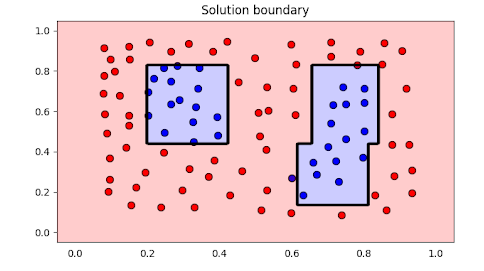

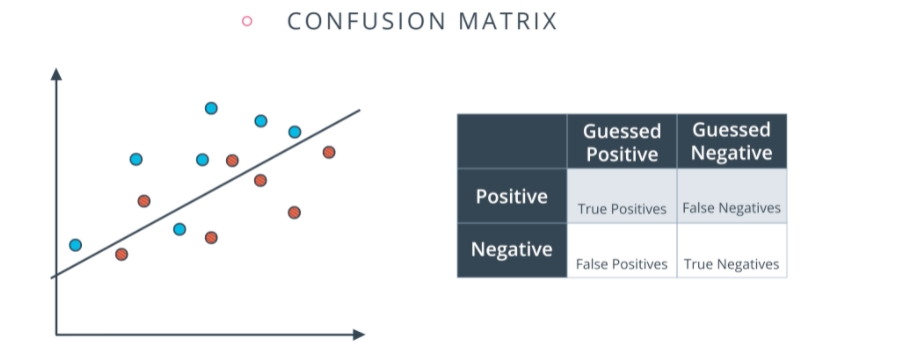

- **Type 1 Error (Error of the first kind, or False Positive):** In the medical example, this is when we misdiagnose a healthy patient as sick.
- **Type 2 Error (Error of the second kind, or False Negative):** In the medical example, this is when we misdiagnose a sick patient as healthy.

## Classification Measures
If you are fitting your model to predict categorical data (spam not spam), there are different measures to understand how well your model is performing than if you are predicting numeric values (the price of a home).

- **Accuracy** - Accuracy is often used to compare models, as it tells us the proportion of observations we correctly labeled.
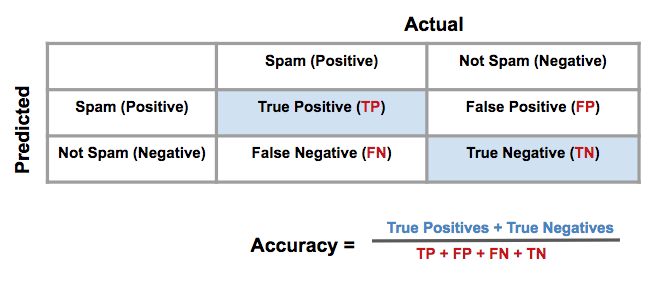

Often accuracy is not the only metric you should be optimizing on. This is especially the case when you have class imbalance in your data. Optimizing on only accuracy can be misleading in how well your model is truly performing. With that in mind, you saw some additional metrics.

- **Precision** - Precision focuses on the predicted "positive" values in your dataset. By optimizing based on precision values, you are determining if you are doing a good job of predicting the positive values, as compared to predicting negative values as positive.

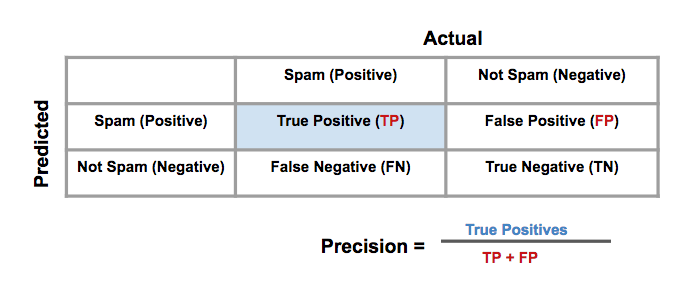

- **Recall** - Recall focuses on the actual "positive" values in your dataset. By optimizing based on recall values, you are determining if you are doing a good job of predicting the positive values without regard of how you are doing on the actual negative values. If you want to perform something similar to recall on the actual 'negative' values, this is called `specificity (TN / (TN + FP))`.

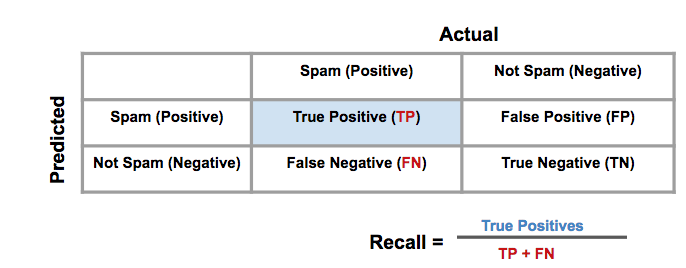

## F1 Score 

For the following, remember that the formula for F1 Score is:

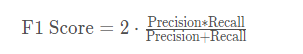

### Boundaries in the F-beta score

In order to look at a combination of metrics at the same time, there are some common techniques like the F-Beta Score (where the F1 score is frequently used), as well as the ROC and AUC. You can see that the \betaβ parameter controls the degree to which precision is weighed into the F score, which allows precision and recall to be considered simultaneously. The most common value for beta is 1, as this is where you are finding the harmonic average between precision and recall.

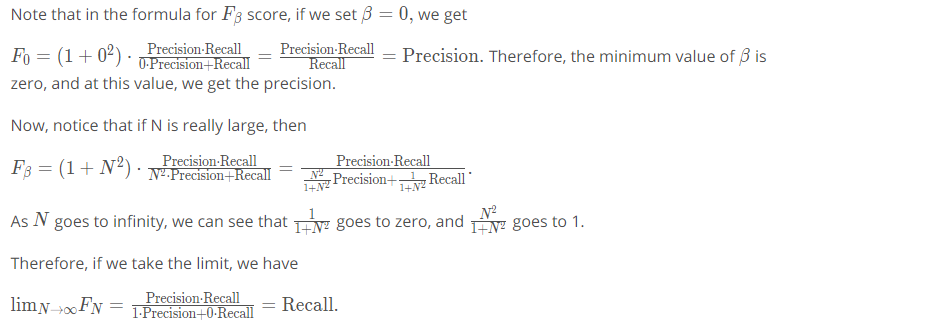
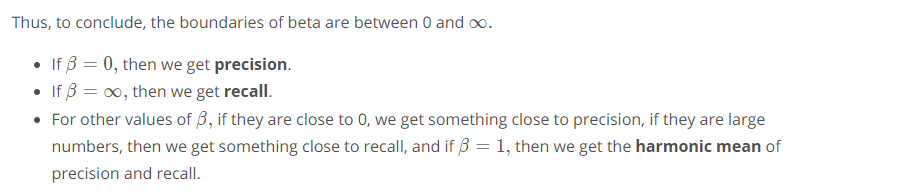

### ROC Curve 

By finding different thresholds for our classification metrics, we can measure the area under the curve (where the curve is known as a ROC curve). Similar to each of the other metrics above, when the AUC is higher (closer to 1), this suggests that our model performance is better than when our metric is close to 0.

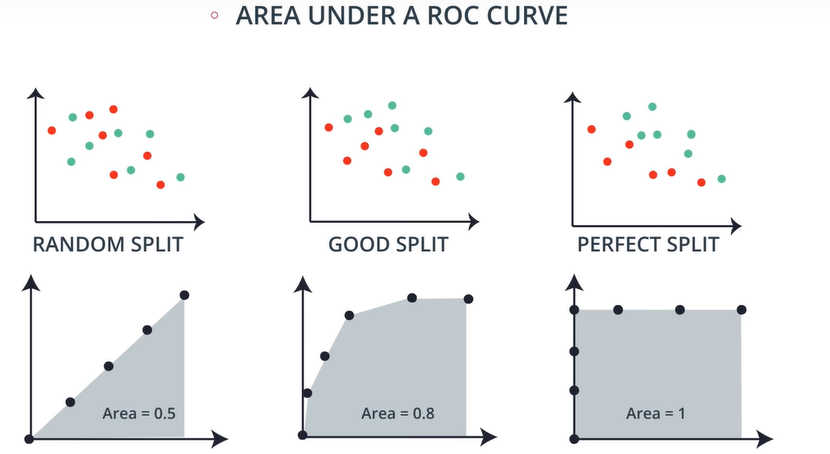

You may end up choosing to optimize on any of these measures. I commonly end up using AUC or an F1 score in practice. However, there are always reason to choose one measure over another depending on your situation.

## R2 Square 
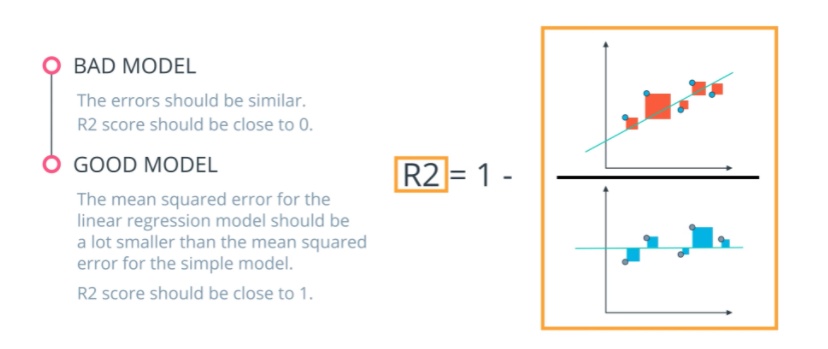